Import libraries for Data Cleaning/Visualization

In [1]:
import warnings
from scipy import stats
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk.corpus
nltk.download('stopwords')
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Install jupyter_nbextensions for improved readability 

Import board_games.csv dataset into notebook

In [3]:
bg_df = pd.read_csv('board_games.csv')

View first 5 rows of dataset

In [4]:
bg_df.head()

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           240  ...   
1       12            3            30    Dragonmaster            30  ...   
2       10            2            30         Samurai            60  ...   
3       12            2            60  Tal der Könige            60  ...   
4       12            3            90         Acquire            90  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   

                designer expansion  \
0     Karl-Heinz Schmiel       NaN   
1  G. W. "Jerry" D'Arcey       NaN   
2          Reiner Knizia       NaN   
3      Christian Beierer       NaN   
4            Sid Sackson       NaN   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
3                                             KOSMOS        6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   

  users_rated  
0        4498  
1         478  
2       12019  
3         314  
4       15195  

[5 rows x 22 columns]

View last 5 rows of data

In [5]:
bg_df.tail()

game_id                                        description  \
10527   214996  Description from the publisher:&#10;&#10;Silve...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10530   216201  The race is on for the robots of the Robo Rall...   
10531   216725  The deluxe edition comes in a double tall box ...   

                                              image  max_players  \
10527  //cf.geekdo-images.com/images/pic3093082.png            2   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10530  //cf.geekdo-images.com/images/pic3374227.jpg            6   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   

       max_playtime  min_age  min_players  min_playtime  \
10527           480       12            1            30   
10528            45       13            2            45   
10529            20       12            2            20   
10530           120       12            2            20   
10531            60       14            1            30   

                                                    name  playing_time  ...  \
10527  Silver Bayonet: The First Team in Vietnam, 196...           480  ...   
10528               Codex: Card-Time Strategy – Core Set            45  ...   
10529                                     Wind the Film!            20  ...   
10530                                  Robo Rally (2016)           120  ...   
10531    Villages of Valeria: Deluxe Kickstarter Edition            60  ...   

                       artist                                     category  \
10527          Charles Kibler                          Vietnam War,Wargame   
10528                     NaN  Card Game,Fantasy,Fighting,Video Game Theme   
10529  宝井 貴子 (Takako Takarai)                                    Card Game   
10530                     NaN            Miniatures,Racing,Science Fiction   
10531    Mihajlo Dimitrievski                      Card Game,City Building   

                                             compilation  \
10527                                                NaN   
10528                                                NaN   
10529                                                NaN   
10530                                                NaN   
10531  Villages of Valeria,Villages of Valeria: Bard ...   

                             designer  \
10527  Gene Billingsley,Mitchell Land   
10528                    David Sirlin   
10529                          Saashi   
10530                Richard Garfield   
10531   Rick Holzgrafe,Isaias Vallejo   

                                               expansion  \
10527                                                NaN   
10528  Codex: Card-Time Strategy – Flagstone Dominion...   
10529                                                NaN   
10530                                                NaN   
10531                                                NaN   

                                           family  \
10527                      GMT Operational System   
10528                              Fantasy Strike   
10529                                         NaN   
10530                                      Robots   
10531  Crowdfunding: Kickstarter,Tableau Building   

                                                mechanic  \
10527                                    Hex-and-Counter   
10528  Deck / Pool Building,Hand Management,Variable ...   
10529                     Hand Management,Set Collection   
10530  Action / Movement Programming,Grid Movement,Mo...   
10531                      Card Drafting,Hand Management   

                         publisher average_rating users_rated  
10527                    GMT Games        8.35333          75  
10528                 Sirlin Games        8.08780          82  
10529              Saashi & Saashi        7

Get information on the dataset: <br/>
10,532 observations  <br/>
dtypes: float64(1), int64(9), object(12)  <br/>
21 Features present  <br/>
1.8 mb of memory

In [6]:
bg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

Range of the index of the dataset

In [7]:
bg_df.index

RangeIndex(start=0, stop=10532, step=1)

Types of data features contain

In [8]:
bg_df.dtypes

game_id             int64
description        object
image              object
max_players         int64
max_playtime        int64
min_age             int64
min_players         int64
min_playtime        int64
name               object
playing_time        int64
thumbnail          object
year_published      int64
artist             object
category           object
compilation        object
designer           object
expansion          object
family             object
mechanic           object
publisher          object
average_rating    float64
users_rated         int64
dtype: object

Description of the numerical variables in the dataset. The Central Tendancy measures of the features are shown as well as the dispersion and shape of the dataset's distribution. This high level analysis is good for an overview analysis. However for a more detailed insight the arithmetic mean is heavily influenced by outliers. (Rudich and Lewis 2018; Tatum 2018)

In [9]:
bg_df.describe()

game_id   max_players  max_playtime       min_age   min_players  \
count   10532.000000  10532.000000  10532.000000  10532.000000  10532.000000   
mean    62059.203095      5.657330     91.341436      9.714964      2.070547   
std     66223.716828     18.884403    659.754400      3.451226      0.664394   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%      5444.500000      4.000000     30.000000      8.000000      2.000000   
50%     28822.500000      4.000000     45.000000     10.000000      2.000000   
75%    126409.500000      6.000000     90.000000     12.000000      2.000000   
max    216725.000000    999.000000  60000.000000     42.000000      9.000000   

       min_playtime  playing_time  year_published  average_rating  \
count  10532.000000  10532.000000    10532.000000    10532.000000   
mean      80.882738     91.341436     2003.070832        6.370856   
std      637.873893    659.754400       12.278296        0.850364   
min        0.000000      0.000000     1950.000000        1.384210   
25%       25.000000     30.000000     1998.000000        5.829585   
50%       45.000000     45.000000     2007.000000        6.392965   
75%       90.000000     90.000000     2012.000000        6.942675   
max    60000.000000  60000.000000     2016.000000        9.003920   

        users_rated  
count  10532.000000  
mean     870.081466  
std     2880.214998  
min       50.000000  
25%       85.000000  
50%      176.000000  
75%      518.000000  
max    67655.000000

Return the sum of the null values present in features. 
<br/>
<br/>
Note: Large amount of null values present in the data 
<br/>
These null values must be removed/imputed/mean substitution etc.
<br/>


In [10]:
bg_df.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

Print the number of unique values in the dataset for categorical features. <br/>
There are a high number of unique values in the data so these will have to be cleaned and processed in order to be able to visualize them

In [11]:
print('Unique Categorical Values')
print('*************************')
print(bg_df['game_id'].nunique(), 'unique IDs')
print(bg_df['artist'].nunique(), 'unique Artists')
print(bg_df['name'].nunique(), 'unique Names')
print(bg_df['category'].nunique(), 'unique Categories')
print(bg_df['designer'].nunique(), 'unique Designers')
print(bg_df['family'].nunique(), "unique Family's")
print(bg_df['mechanic'].nunique(), 'unique Mechanics')
print(bg_df['publisher'].nunique(), 'unique Publishers')

Unique Categorical Values
*************************
10532 unique IDs
4641 unique Artists
10357 unique Names
3860 unique Categories
4678 unique Designers
3918 unique Family's
3209 unique Mechanics
5512 unique Publishers


Compare two similar columns to see duplicate values

In [12]:
print(bg_df['playing_time'].unique())
print(bg_df['max_playtime'].unique())

[  240    30    60    90    20   120    45    25     5   360   200   340
   180   300     0    40   150   480    15    75 12000  2480    70    10
  1200   100   210    80  6000  1440   270    35    50   420  4320   960
  3600 60000   720     6  5400  2880  1500   700     1  3000   600    12
  4500  1800    23  2400   105   160   900     2     3    55   222    33
   135 17280   540   500    13   400   140  1000   108    39   750    95
    68    32   125   165   290     4   115   130    42    11    19]
[  240    30    60    90    20   120    45    25     5   360   200   340
   180   300     0    40   150   480    15    75 12000  2480    70    10
  1200   100   210    80  6000  1440   270    35    50   420  4320   960
  3600 60000   720     6  5400  2880  1500   700     1  3000   600    12
  4500  1800    23  2400   105   160   900     2     3    55   222    33
   135 17280   540   500    13   400   140  1000   108    39   750    95
    68    32   125   165   290     4   115   130    42  

Calculate number of duplicate values between the similar columns

In [13]:
bg_df.duplicated(subset=['playing_time', 'max_playtime']).sum()

10449

## Step 2: Data Cleaning

These columns contain data that is irrelavant to the dataset. These include hyperlinks to pictures that are unavailable, features that contain <80% of values that are missing and duplicate columns. For these reasons we are eliminating them from the dataset.

In [14]:
bg_df.drop(columns=['image', 'thumbnail','compilation','expansion','playing_time'],inplace=True)

Make all columns with string values lowercase in order to avoid errors in values that are uppercase

In [15]:
bg_df['description'] = bg_df['description'].str.lower()
bg_df['name'] = bg_df['name'].str.lower()
bg_df['artist'] = bg_df['artist'].str.lower()
bg_df['category'] = bg_df['category'].str.lower()
bg_df['designer'] = bg_df['designer'].str.lower()
bg_df['family'] = bg_df['family'].str.lower()
bg_df['mechanic'] = bg_df['mechanic'].str.lower()
bg_df['publisher'] = bg_df['publisher'].str.lower()

In [16]:
"""spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    bg_df['description'] = bg_df['description'].str.replace(char, ' ');
    bg_df['name'] = bg_df['name'].str.replace(char, ' ');
    bg_df['artist'] = bg_df['artist'].str.replace(char, ' ');
    bg_df['category'] = bg_df['category'].str.replace(char, ' ');
    bg_df['designer'] = bg_df['designer'].str.replace(char, ' ');
    bg_df['family'] = bg_df['family'].str.replace(char, ' ');
    bg_df['mechanic'] = bg_df['mechanic'].str.replace(char, ' ');
    bg_df['publisher'] = bg_df['publisher'].str.replace(char, ' ');
"""

'spec_chars = ["!",\'"\',"#","%","&","\'","(",")",\n              "*","+",",","-",".","/",":",";","<",\n              "=",">","?","@","[","\\","]","^","_",\n              "`","{","|","}","~","–"]\nfor char in spec_chars:\n    bg_df[\'description\'] = bg_df[\'description\'].str.replace(char, \' \');\n    bg_df[\'name\'] = bg_df[\'name\'].str.replace(char, \' \');\n    bg_df[\'artist\'] = bg_df[\'artist\'].str.replace(char, \' \');\n    bg_df[\'category\'] = bg_df[\'category\'].str.replace(char, \' \');\n    bg_df[\'designer\'] = bg_df[\'designer\'].str.replace(char, \' \');\n    bg_df[\'family\'] = bg_df[\'family\'].str.replace(char, \' \');\n    bg_df[\'mechanic\'] = bg_df[\'mechanic\'].str.replace(char, \' \');\n    bg_df[\'publisher\'] = bg_df[\'publisher\'].str.replace(char, \' \');\n'

After removing columns with missing values and duplicates we are still left with quite a number of missing values. However there is still a lot of data to be gained from these rows of missing values so it would not be beneficial to simply just drop the rows. Instead we will replace these missing values.

In [17]:
bg_df.isnull().sum()

game_id              0
description          0
max_players          0
max_playtime         0
min_age              0
min_players          0
min_playtime         0
name                 0
year_published       0
artist            2773
category            94
designer           126
family            2808
mechanic           950
publisher            3
average_rating       0
users_rated          0
dtype: int64

The features that contain missing values are all string objects so the process of adding the string character "unknown" will not change the data type. The resoning behind this decision is because some of these features have almost 30% of the data missing, to simply drop 30% of the entire dataset because of one or two features would introduce a huge bias to the whole dataset. For this reason the dcision is made to replace the data with the string "unknown"
<br/>
<br/>
By using the inplace parameter we can substitute the missing values with "unknown" and have it appear inplace in our dataset

In [18]:
bg_df.replace(np.nan, 'unknown',inplace=True,regex=True)

In [19]:
bg_df.head()

game_id                                        description  max_players  \
0        1  die macher is a game about seven sequential po...            5   
1        2  dragonmaster is a trick-taking card game based...            4   
2        3  part of the knizia tile-laying trilogy, samura...            4   
3        4  when you see the triangular box and the luxuri...            4   
4        5  in acquire, each player strategically invests ...            6   

   max_playtime  min_age  min_players  min_playtime            name  \
0           240       14            3           240      die macher   
1            30       12            3            30    dragonmaster   
2            60       10            2            30         samurai   
3            60       12            2            60  tal der könige   
4            90       12            3            90         acquire   

   year_published                       artist  \
0            1986          marcus gschwendtner   
1            1981                   bob pepper   
2            1998              franz vohwinkel   
3            1992                      unknown   
4            1964  scott okumura,peter whitley   

                         category               designer  \
0  economic,negotiation,political     karl-heinz schmiel   
1               card game,fantasy  g. w. "jerry" d'arcey   
2      abstract strategy,medieval          reiner knizia   
3                         ancient      christian beierer   
4                        economic            sid sackson   

                                              family  \
0         country: germany,valley games classic line   
1                                   animals: dragons   
2  asian theme,country: japan,knizia tile-laying ...   
3             country: egypt,promotional board games   
4                                3m bookshelf series   

                                            mechanic  \
0  area control / area influence,auction/bidding,...   
1                                       trick-taking   
2  area control / area influence,hand management,...   
3  action point allowance system,area control / a...   
4       hand management,stock holding,tile placement   

                                           publisher  average_rating  \
0  hans im glück verlags-gmbh,moskito spiele,vall...         7.66508   
1                           e.s. lowe,milton bradley         6.60815   
2  999 games,abacusspiele,astrel games,ceilikan j...         7.44119   
3                                             kosmos         6.60675   
4  3m,avalon hill,avalon hill (hasbro),dujardin,g...         7.35830   

   users_rated  
0         4498  
1          478  
2        12019  
3          314  
4        15195

Create a new dataframe variable to visualise the numerical data earier.<br/>
Select the data that contains floating points and integers

In [20]:
bg_numeric = bg_df.select_dtypes(include=['float64', 'int64'])
bg_numeric.head()

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
0        1            5           240       14            3           240   
1        2            4            30       12            3            30   
2        3            4            60       10            2            30   
3        4            4            60       12            2            60   
4        5            6            90       12            3            90   

   year_published  average_rating  users_rated  
0            1986         7.66508         4498  
1            1981         6.60815          478  
2            1998         7.44119        12019  
3            1992         6.60675          314  
4            1964         7.35830        15195

In [21]:
bg_numeric.sort_values(by=['average_rating']).tail(5)

bg_numeric.sort_values(['average_rating'], ascending=False).groupby('average_rating').head()

bg_df.nlargest(5, 'average_rating')

df = pd.DataFrame(bg_df)
average_df = df[['name', 'average_rating']]
avg_df = average_df.copy()

avg_df.nlargest(5, 'average_rating')

name  average_rating
8348                     small world designer edition         9.00392
6392                           kingdom death: monster         8.93184
9964                           terra mystica: big box         8.84862
8526                          last chance for victory         8.84603
9675  the greatest day: sword, juno, and gold beaches         8.83081

In order to determine if there is any correlation between the user rating and maximum playtime features we will first have to calculate the outliers of the data, as corrrelation coefficients are very sensitive to outliers in the data

From this scatterplot of our features that we are investigating to determine if correlation exists, we can clearly visualize the outlier data points that are drastically changing the correlation of the distribution. For this reason we will remove the outliers from our numeric dataset.

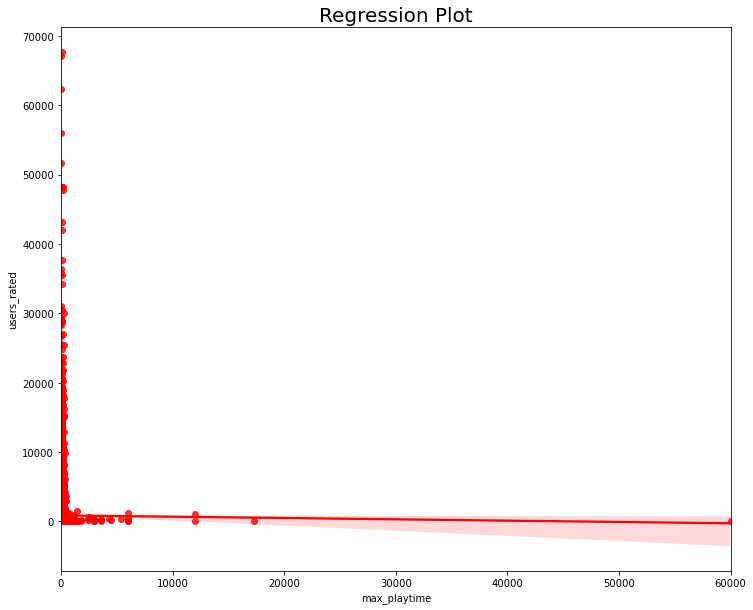

In [22]:
plt.figure(figsize=(12, 10))
plt.title('Regression Plot',fontdict={'fontsize': 20})
sns.regplot(x='max_playtime',y='users_rated',data=bg_numeric,color='r');

<br/><br/>

Our boxplots shows the enormity of the outliers present in our max_playtime and users_rated features and the need to remove them

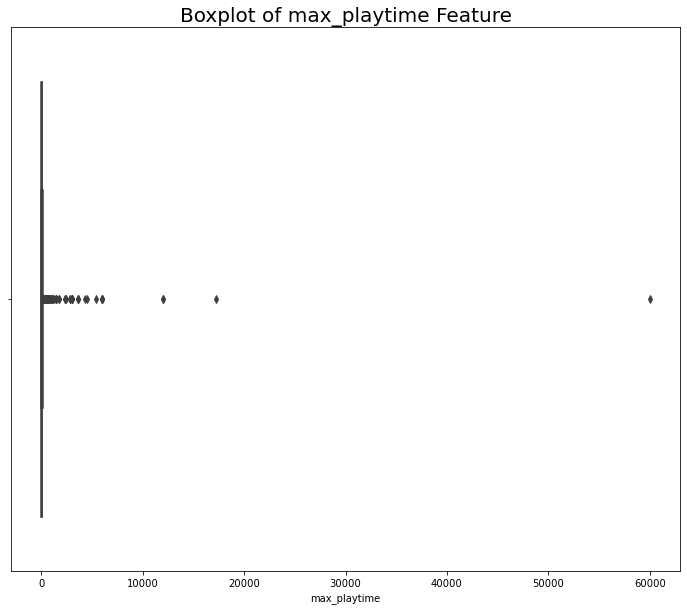

In [23]:
plt.figure(figsize=(12,10))
plt.title('Boxplot of max_playtime Feature',fontdict={'fontsize':20})
sns.boxplot(bg_numeric.max_playtime);

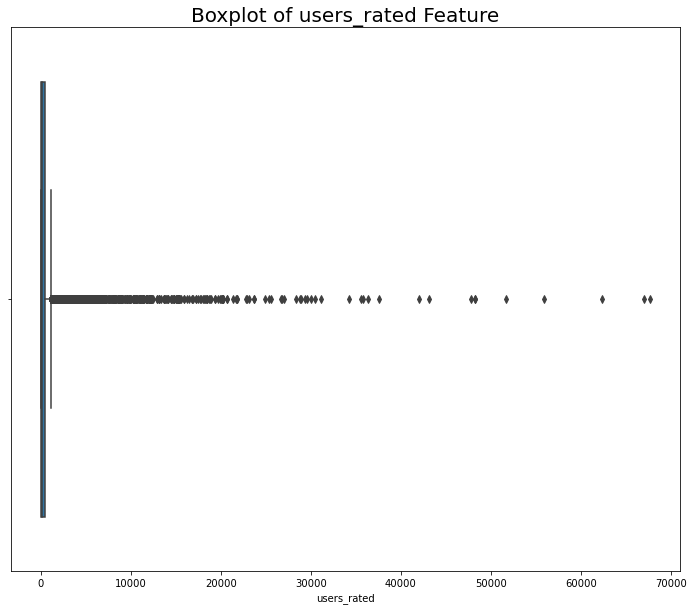

In [24]:
plt.figure(figsize=(12,10))
plt.title('Boxplot of users_rated Feature',fontdict={'fontsize':20})
sns.boxplot(bg_numeric.users_rated);

In order to calculate the outliers of the numerical features we will first have to calculate the z-scores in order to determine if they are located more than 3 standard deviations from the mean. 

In [25]:
z=np.abs(stats.zscore(bg_numeric))
print(z)

remove_outlier = (z < 3).all(axis=1)

[[0.93714386 0.03480975 0.22533479 ... 1.39039186 1.52203698 1.25965971]
 [0.93712876 0.08776601 0.09298058 ... 1.79763383 0.27906319 0.1361357 ]
 [0.93711366 0.08776601 0.04750696 ... 0.41301111 1.25873724 3.87104708]
 ...
 [2.3166788  0.08776601 0.10813846 ... 1.05306001 1.06936228 0.28022901]
 [2.32770256 0.01814652 0.04344029 ... 1.05306001 1.27934116 0.18370385]
 [2.33561551 0.03480975 0.04750696 ... 1.05306001 1.36248597 0.26078509]]


Outliers are removed from the data and the new dataframe is initialized

In [26]:
new_bg_numeric = bg_numeric[remove_outlier]

new_bg_numeric

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
0            1            5           240       14            3           240   
1            2            4            30       12            3            30   
3            4            4            60       12            2            60   
5            6            6           240       12            2           240   
6            7            2            20        8            2            20   
...        ...          ...           ...      ...          ...           ...   
10527   214996            2           480       12            1            30   
10528   215437            5            45       13            2            45   
10529   215471            4            20       12            2            20   
10530   216201            6           120       12            2            20   
10531   216725            5            60       14            1            30   

       year_published  average_rating  users_rated  
0                1986         7.66508         4498  
1                1981         6.60815          478  
3                1992         6.60675          314  
5                1989         6.52534           73  
6                1978         6.50534         2751  
...               ...             ...          ...  
10527            2016         8.35333           75  
10528            2016         8.08780           82  
10529            2016         7.28016           63  
10530            2016         7.45871          341  
10531            2016         7.52941          119  

[9999 rows x 9 columns]

In [27]:
bg_numeric.describe()

game_id   max_players  max_playtime       min_age   min_players  \
count   10532.000000  10532.000000  10532.000000  10532.000000  10532.000000   
mean    62059.203095      5.657330     91.341436      9.714964      2.070547   
std     66223.716828     18.884403    659.754400      3.451226      0.664394   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
25%      5444.500000      4.000000     30.000000      8.000000      2.000000   
50%     28822.500000      4.000000     45.000000     10.000000      2.000000   
75%    126409.500000      6.000000     90.000000     12.000000      2.000000   
max    216725.000000    999.000000  60000.000000     42.000000      9.000000   

       min_playtime  year_published  average_rating   users_rated  
count  10532.000000    10532.000000    10532.000000  10532.000000  
mean      80.882738     2003.070832        6.370856    870.081466  
std      637.873893       12.278296        0.850364   2880.214998  
min        0.000000     1950.000000        1.384210     50.000000  
25%       25.000000     1998.000000        5.829585     85.000000  
50%       45.000000     2007.000000        6.392965    176.000000  
75%       90.000000     2012.000000        6.942675    518.000000  
max    60000.000000     2016.000000        9.003920  67655.000000

In [28]:
new_bg_numeric.describe()

game_id  max_players  max_playtime      min_age  min_players  \
count    9999.000000  9999.000000   9999.000000  9999.000000  9999.000000   
mean    62863.519652     4.712971     75.301030     9.704370     2.056706   
std     66494.655015     2.833307     96.946569     3.408656     0.582883   
min         1.000000     0.000000      0.000000     0.000000     1.000000   
25%      5685.000000     4.000000     30.000000     8.000000     2.000000   
50%     29656.000000     4.000000     45.000000    10.000000     2.000000   
75%    127766.000000     6.000000     90.000000    12.000000     2.000000   
max    216725.000000    61.000000   1800.000000    18.000000     4.000000   

       min_playtime  year_published  average_rating  users_rated  
count   9999.000000     9999.000000     9999.000000  9999.000000  
mean      68.960696     2003.589159        6.375087   583.536754  
std       88.336990       11.395455        0.810306  1145.394564  
min        0.000000     1967.000000        3.825000    50.000000  
25%       25.000000     1998.000000        5.840790    85.000000  
50%       45.000000     2007.000000        6.388660   172.000000  
75%       90.000000     2012.000000        6.925050   487.000000  
max     1800.000000     2016.000000        8.848620  9422.000000

We can now plot the relationship between the 2 features again and see a better distribution of them.<br/>
As we can see from the regression plot there is not much of a relationship/correlation between the two features.<br/>

<AxesSubplot:title={'center':'Regression Plot'}, xlabel='max_playtime', ylabel='users_rated'>

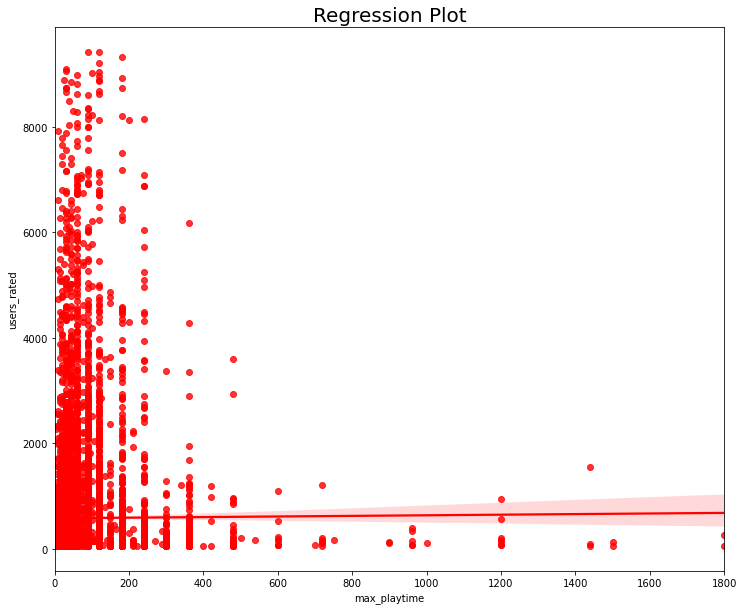

In [29]:
plt.figure(figsize=(12, 10))
plt.title('Regression Plot',fontdict={'fontsize': 20})
sns.regplot(x='max_playtime',y='users_rated',data=new_bg_numeric,color='r')

In order to further examine the correlation between max_playtime and users_rated we will calcute the correlation coefficients of them and get an exact number on how the correlation is between them.<br/><br/>
First we will calculate the Pearson Correlation Coefficent. The Pearson Correlation Coefficient calculates the strength and direction of a linear relationship between two features(Benesty, J et al, 2008)

### Pearson Correlation Coefficient

First, generate a table to calculate the relationships between each numeric feature in the dataset.

In [30]:
cor = new_bg_numeric.corr(method='pearson')
cor

game_id  max_players  max_playtime   min_age  min_players  \
game_id         1.000000     0.021246     -0.162183  0.043388    -0.065521   
max_players     0.021246     1.000000     -0.108045  0.015261     0.277366   
max_playtime   -0.162183    -0.108045      1.000000  0.208467    -0.099222   
min_age         0.043388     0.015261      0.208467  1.000000     0.035673   
min_players    -0.065521     0.277366     -0.099222  0.035673     1.000000   
min_playtime   -0.234113    -0.111894      0.915510  0.204363    -0.077779   
year_published  0.729426     0.054218     -0.209513 -0.034179     0.019786   
average_rating  0.354604    -0.148795      0.271145  0.164571    -0.146475   
users_rated     0.008227     0.033436      0.004803  0.111817    -0.001363   

                min_playtime  year_published  average_rating  users_rated  
game_id            -0.234113        0.729426        0.354604     0.008227  
max_players        -0.111894        0.054218       -0.148795     0.033436  
max_playtime        0.915510       -0.209513        0.271145     0.004803  
min_age             0.204363       -0.034179        0.164571     0.111817  
min_players        -0.077779        0.019786       -0.146475    -0.001363  
min_playtime        1.000000       -0.264500        0.228628    -0.017496  
year_published     -0.264500        1.000000        0.300294     0.069493  
average_rating      0.228628        0.300294        1.000000     0.274224  
users_rated        -0.017496        0.069493        0.274224     1.000000

By using a heatmap we are able to plot each feature and the Pearson Correlation Coefficient of each linear relationship. The color palette "mako" is chosen as the range of colours are well suited for heatmaps due to its colour harmony.

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

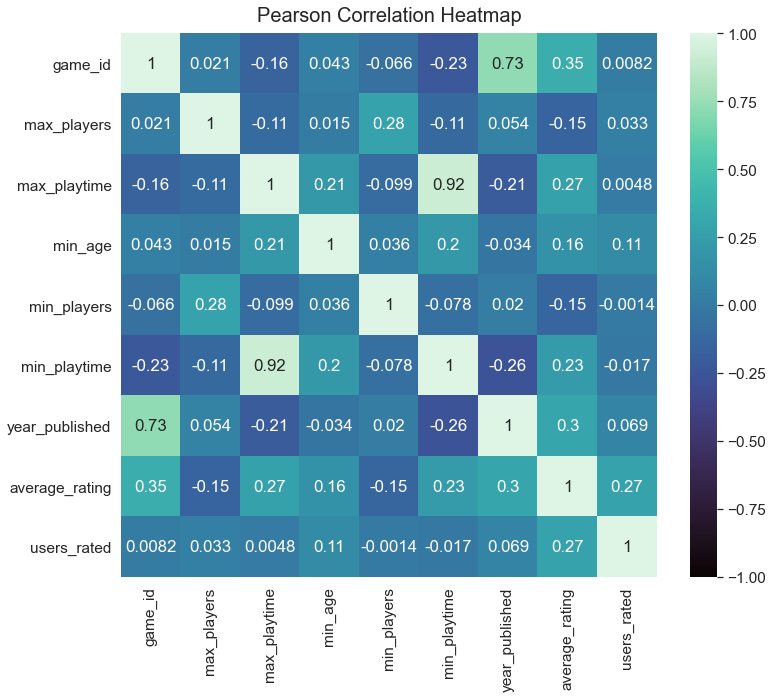

In [31]:
plt.figure(figsize=(12, 10))
sns.color_palette("mako", as_cmap=True)
sns.set(font_scale=1.4)
heatmap = sns.heatmap(cor, center=0, vmin=-1, vmax=1, annot=True,cmap='mako')
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize': 20}, pad=12)

### Kendall Correlation Coefficient

Another correlation we can use is the Kendall Correlation Coefficient that measures the dependency of the variables

In [32]:
kcor = new_bg_numeric.corr(method='kendall')
kcor

game_id  max_players  max_playtime   min_age  min_players  \
game_id         1.000000     0.019670     -0.124788  0.010929    -0.059264   
max_players     0.019670     1.000000     -0.072972 -0.041547     0.283526   
max_playtime   -0.124788    -0.072972      1.000000  0.373459    -0.051442   
min_age         0.010929    -0.041547      0.373459  1.000000    -0.005665   
min_players    -0.059264     0.283526     -0.051442 -0.005665     1.000000   
min_playtime   -0.189218    -0.075812      0.904197  0.357982    -0.029619   
year_published  0.817356     0.049241     -0.130588  0.015251    -0.027740   
average_rating  0.228135    -0.144315      0.227451  0.203618    -0.122931   
users_rated    -0.001269     0.058109      0.063747  0.093446     0.014681   

                min_playtime  year_published  average_rating  users_rated  
game_id            -0.189218        0.817356        0.228135    -0.001269  
max_players        -0.075812        0.049241       -0.144315     0.058109  
max_playtime        0.904197       -0.130588        0.227451     0.063747  
min_age             0.357982        0.015251        0.203618     0.093446  
min_players        -0.029619       -0.027740       -0.122931     0.014681  
min_playtime        1.000000       -0.198536        0.182555     0.048908  
year_published     -0.198536        1.000000        0.247650     0.059165  
average_rating      0.182555        0.247650        1.000000     0.209554  
users_rated         0.048908        0.059165        0.209554     1.000000

Generate Heatmap of Kendalls correlation coefficient <br/><br/>
Enable Title to be larger than the rest of the font for visual purposes

Text(0.5, 1.0, 'Kendall Correlation Heatmap')

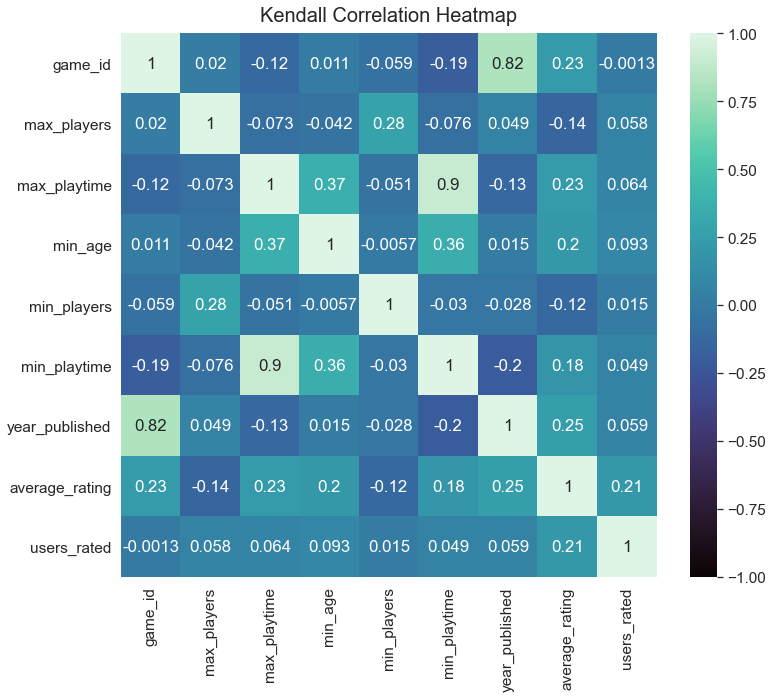

In [33]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(kcor, center=0, vmin=-1, vmax=1, annot=True,cmap='mako')
heatmap.set_title('Kendall Correlation Heatmap', fontdict={'fontsize': 20}, pad=12)

<br/><br/>

Create a new dataframe variable of the categories

In [34]:
df = pd.DataFrame(bg_df)
category = df[['category']]
cat_df = category.copy()

View the first 10 rows of values in the "category" feature

In [35]:
cat_df.head(10)

category
0  economic,negotiation,political
1               card game,fantasy
2      abstract strategy,medieval
3                         ancient
4                        economic
5           civilization,nautical
6               abstract strategy
7            civilization,fantasy
8                     exploration
9                  fantasy,travel

<br/><br/>

View the value counts of the feature.
<br/><br/>
We can see from these value counts that a lot of the same values are present in other observations but are not calculated the same in the value counts function.

In [36]:
cat_df.category.value_counts()

wargame,world war ii                                449
card game                                           438
abstract strategy                                   284
napoleonic,wargame                                  124
economic                                            116
                                                   ... 
deduction,nautical                                    1
comic book / strip,dice,fighting,science fiction      1
ancient,city building,economic                        1
abstract strategy,card game,fantasy,fighting          1
civilization,economic,political                       1
Name: category, Length: 3861, dtype: int64

<br/><br/>

In order to seperate these common features we will have to split the string object by the commas that seperate each category and expand them into new columns

In [37]:
cat_df['category'].str.split(',' ,expand=True)

0              1                2                 3   \
0               economic    negotiation        political              None   
1              card game        fantasy             None              None   
2      abstract strategy       medieval             None              None   
3                ancient           None             None              None   
4               economic           None             None              None   
...                  ...            ...              ...               ...   
10527        vietnam war        wargame             None              None   
10528          card game        fantasy         fighting  video game theme   
10529          card game           None             None              None   
10530         miniatures         racing  science fiction              None   
10531          card game  city building             None              None   

         4     5     6     7     8     9     10    11    12    13  
0      None  None  None  None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  None  None  None  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
10527  None  None  None  None  None  None  None  None  None  None  
10528  None  None  None  None  None  None  None  None  None  None  
10529  None  None  None  None  None  None  None  None  None  None  
10530  None  None  None  None  None  None  None  None  None  None  
10531  None  None  None  None  None  None  None  None  None  None  

[10532 rows x 14 columns]

<br/><br/>

We can then calculate the values of each split category and store them in the variable "split_category"

In [38]:
split_category = cat_df['category'].str.split(',',expand=True).stack().value_counts()
split_category

card game                  2981
wargame                    2034
fantasy                    1218
fighting                    900
economic                    878
                           ... 
pike and shot                27
game system                  22
american indian wars         15
korean war                   14
expansion for base-game      11
Length: 84, dtype: int64

<br/><br/>

We now have the categories split by the delimiter "," and the counts of these categories present in the dataset.
<br/><br/>
Then we store the categories and their counts in a dataframe variable called "split_cat_df"

In [39]:
split_cat_df =  pd.DataFrame(split_category,columns=['count'])
split_cat_df

count
card game                 2981
wargame                   2034
fantasy                   1218
fighting                   900
economic                   878
...                        ...
pike and shot               27
game system                 22
american indian wars        15
korean war                  14
expansion for base-game     11

[84 rows x 1 columns]

<br/><br/>

A bar chart is used to show comparisons of categorical data. This is suitable to use for this categorical data and provides massive insight to our categorical values.
<br/><br/>
It is clear to see the games with the highest distribution throughout the data as well as the lowest.<br/><br/>
Enable Title to be larger than the rest of the font for visual purposes

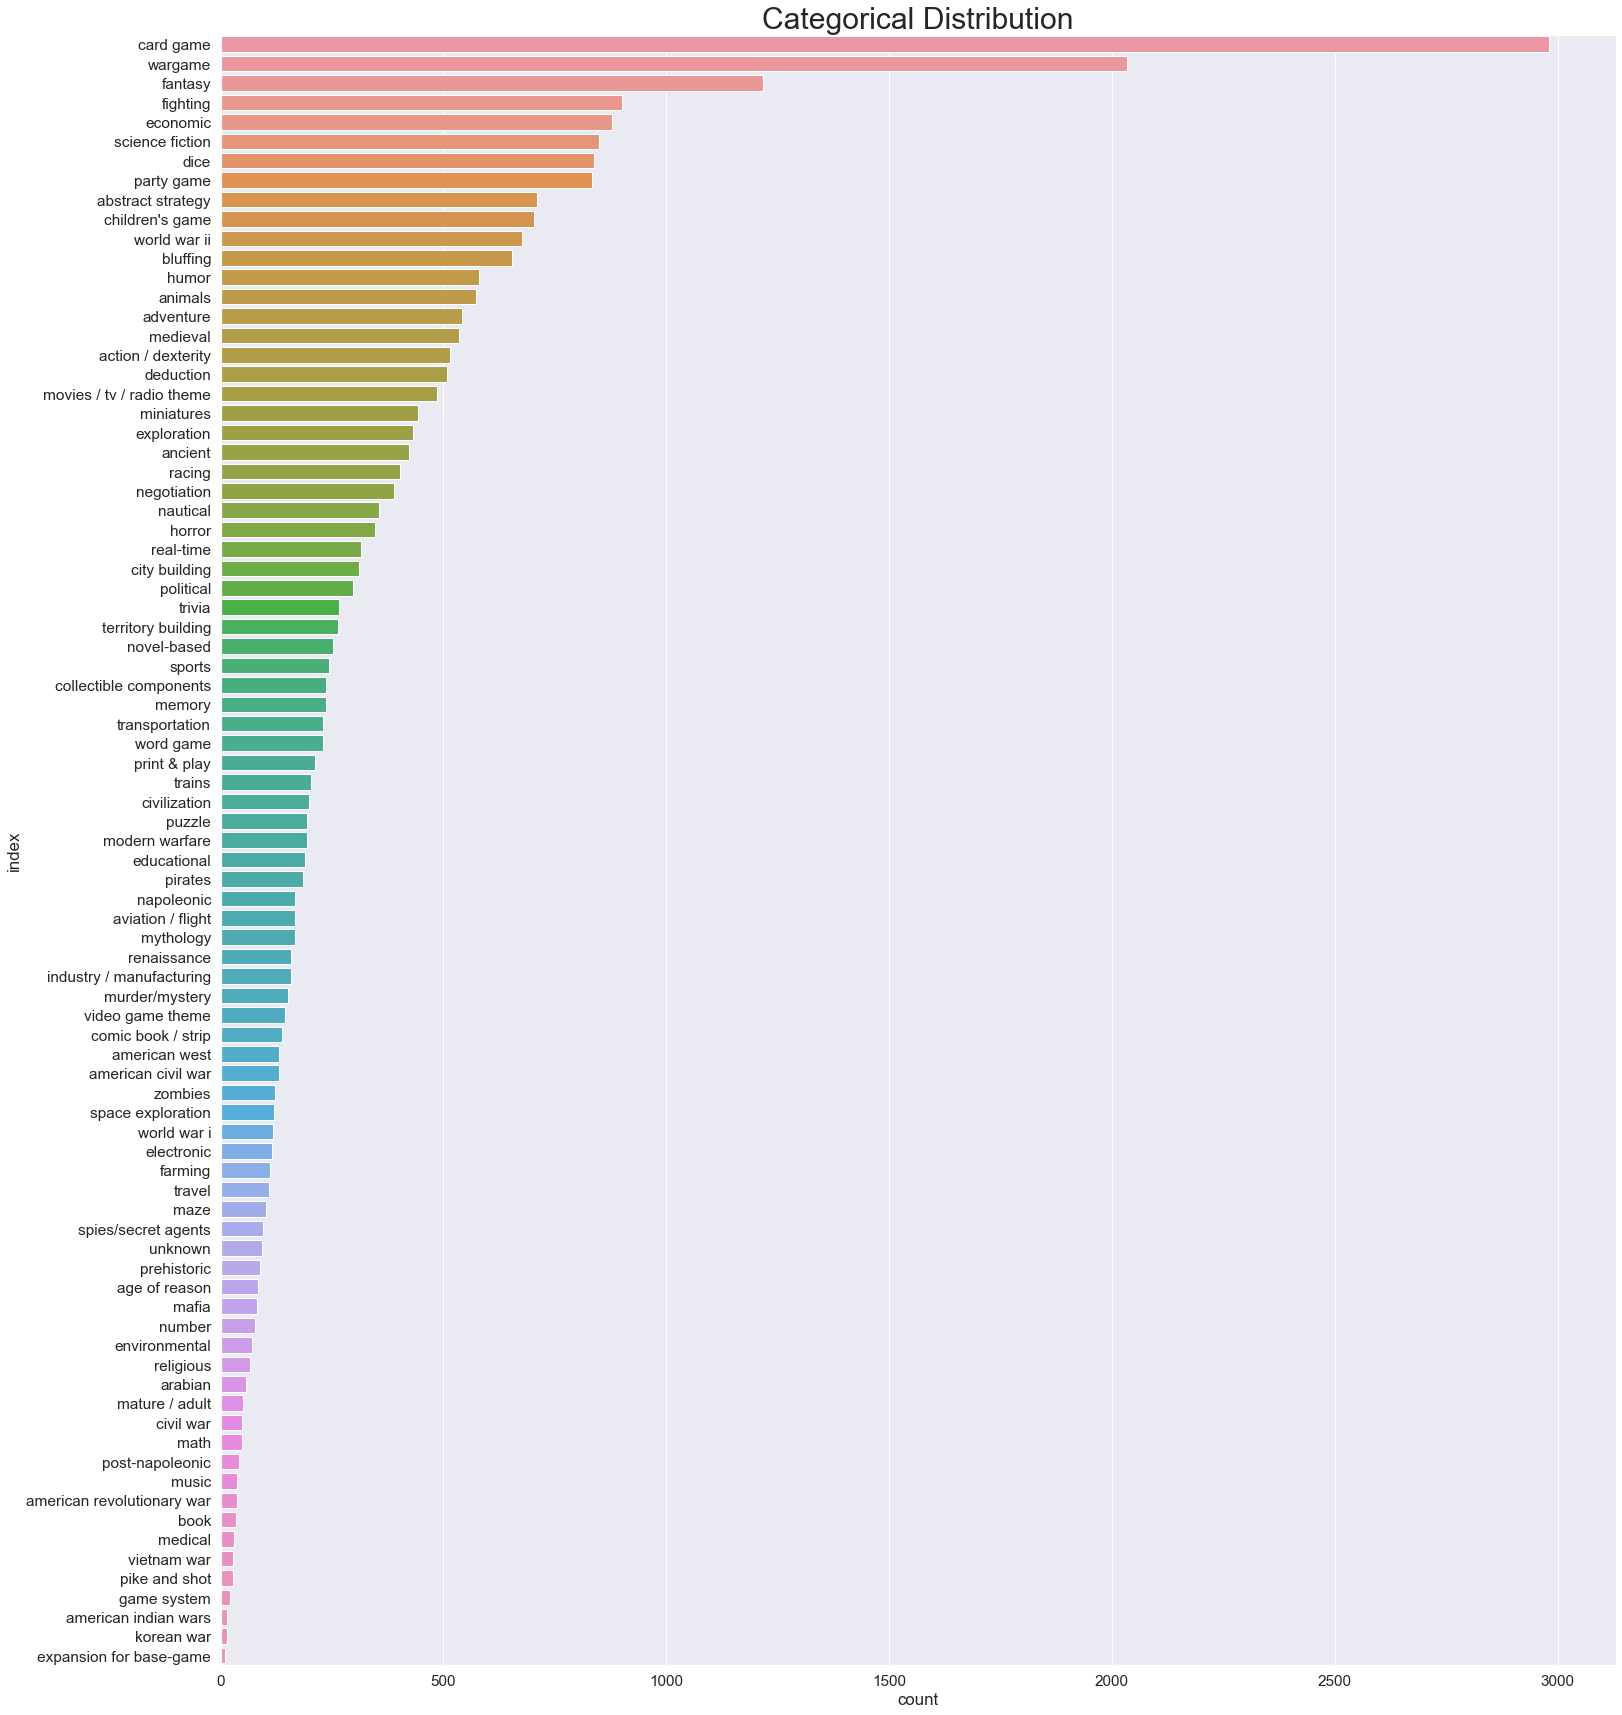

In [40]:
plt.figure(figsize=(25,30))
plt.title('Categorical Distribution',fontdict={'fontsize': 30})
plt.ylabel('Categories')
sns.barplot(data=split_cat_df.reset_index(),y='index',x='count'); #Double-click Graph to zoom

<br/>

<br/>

Using indexing we can see the top ten categories present in the dataset

In [41]:
split_cat_df.iloc[:10]

count
card game           2981
wargame             2034
fantasy             1218
fighting             900
economic             878
science fiction      850
dice                 838
party game           833
abstract strategy    710
children's game      704

We can then take our arrange categorical values and take the top 50

In [42]:
split_50 = split_category[:50]

Tree maps are used for plotting data that has been grouped together in a hierarchical structure. They are useful to get a sense of the distribution of the structured data that is being plotted. The Plotly Express library is imported to display the treemap.

In [43]:
fig = px.treemap(split_50, path=[split_50.index], values=0)
fig.update_layout(title_text='Top Categories in the Dataset',
                  title_x=0.5,
                  title_font=dict(size=20))
fig.update_traces(textinfo="label+value")
fig.show()

In [44]:
bg_numeric

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
0            1            5           240       14            3           240   
1            2            4            30       12            3            30   
2            3            4            60       10            2            30   
3            4            4            60       12            2            60   
4            5            6            90       12            3            90   
...        ...          ...           ...      ...          ...           ...   
10527   214996            2           480       12            1            30   
10528   215437            5            45       13            2            45   
10529   215471            4            20       12            2            20   
10530   216201            6           120       12            2            20   
10531   216725            5            60       14            1            30   

       year_published  average_rating  users_rated  
0                1986         7.66508         4498  
1                1981         6.60815          478  
2                1998         7.44119        12019  
3                1992         6.60675          314  
4                1964         7.35830        15195  
...               ...             ...          ...  
10527            2016         8.35333           75  
10528            2016         8.08780           82  
10529            2016         7.28016           63  
10530            2016         7.45871          341  
10531            2016         7.52941          119  

[10532 rows x 9 columns]

Create a new Dataframe in to seperate year_published and average_rating features

In [45]:
year_rate_df = pd.DataFrame(bg_numeric,columns=['year_published','average_rating'])
year_rate_df

year_published  average_rating
0                1986         7.66508
1                1981         6.60815
2                1998         7.44119
3                1992         6.60675
4                1964         7.35830
...               ...             ...
10527            2016         8.35333
10528            2016         8.08780
10529            2016         7.28016
10530            2016         7.45871
10531            2016         7.52941

[10532 rows x 2 columns]

Kernel density estimate plots are comparable to histograms as they are used to plot the distribution of a feature. They are good visualisation tools as they are less untidy and more easily interpreted visually and uses a probability density curve to display the data.

<AxesSubplot:xlabel='year_published', ylabel='Density'>

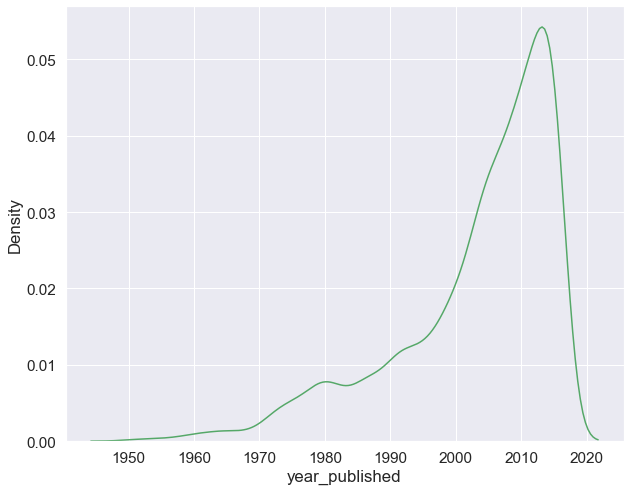

In [46]:
sns.set()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.kdeplot(x='year_published', data=bg_numeric,color='g')

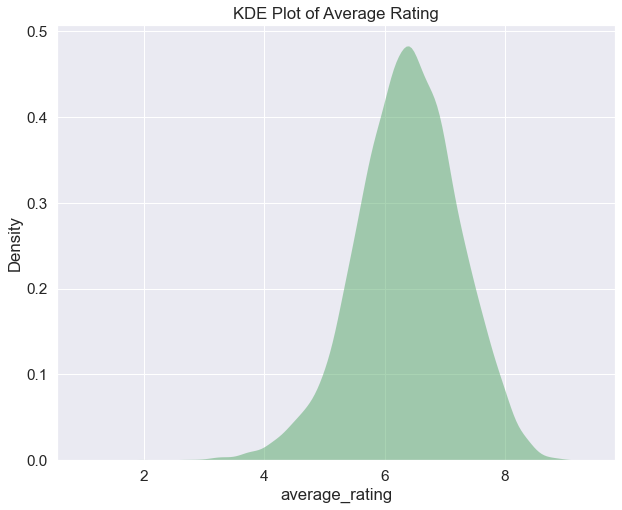

In [47]:
sns.set()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.kdeplot(x='average_rating', data=bg_numeric,fill=True, common_norm=False,color='g',
   alpha=.5, linewidth=0,)
plt.title('KDE Plot of Average Rating');

By using a bivariate kde plot we can plot the probability density curve of both features and visualise where the data points cluster

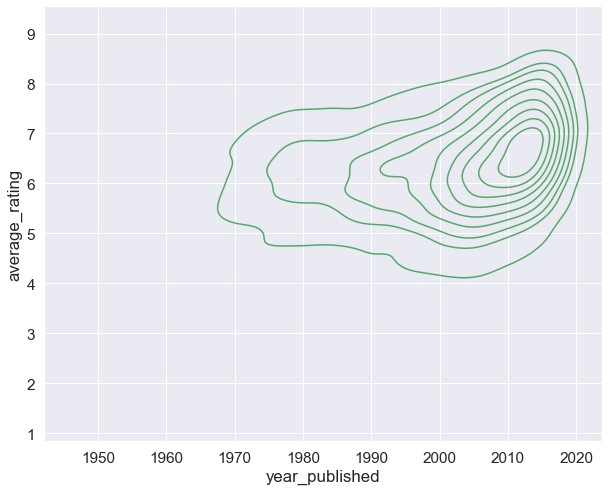

In [48]:
sns.set()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.kdeplot(x='year_published',y='average_rating', data=bg_numeric,fill=False,color='g');

Calculate mean of the year_published feature.

In [49]:
mean_year = bg_numeric.year_published.mean()

By plotting a histogram plot we are able to view the number of times each "year_published" has appeared. Setting the parameter kde to true plots the probability density curve and adding a vertical line to the x axis with the variable mean_year located at the mean on the x axis displays a very informative histogram. <br/><br/>

It is clear to be seen how many more games have been published since the early 2000s<br/><br/>

The selection of colours used is green and red as they are complementary colours that are opposite to one another thus making for a high contrast graphic 


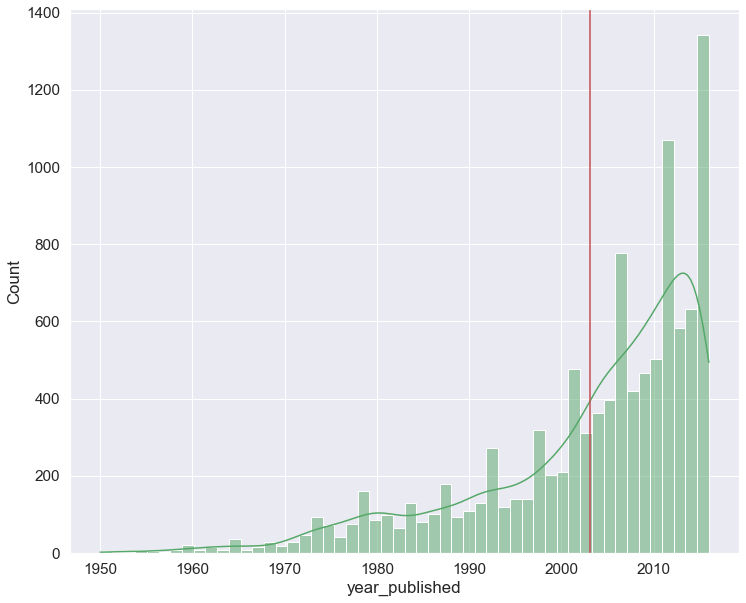

In [50]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.4)
sns.histplot(x='year_published', data=bg_numeric, kde=True,color='g');
plt.axvline(x=mean_year, ymin=0, ymax=1, color='r');

Calculate mean of average rating and store in variable "mean_avg"

In [51]:
mean_avg = bg_numeric.average_rating.mean()

Histogram plot of avearge_rating feature shows a near normal distribution with the mean being nearly the center of the distribution and the data symmetrical around it.

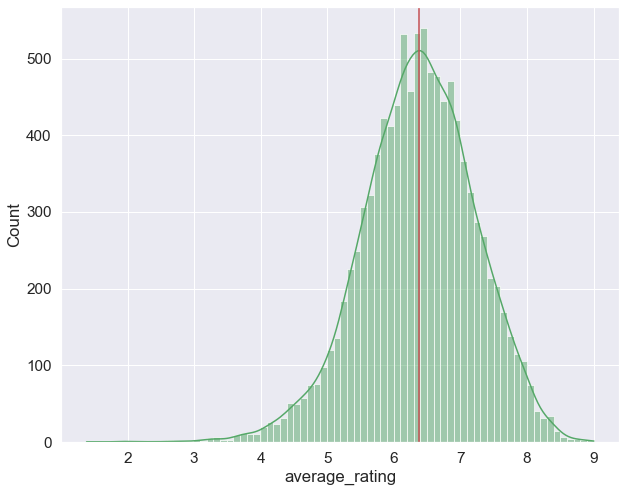

In [52]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.histplot(x='average_rating', data=bg_numeric, kde=True,color='g')
plt.axvline(x=mean_avg, ymin=0, ymax=1, color='r')

<br/><br/>

Create new dataframe variable to hold year_published & average_rating features

In [53]:
df = pd.DataFrame(bg_numeric)
mean_rating = df[['year_published','average_rating']]
year_mean_df = mean_rating.copy()

year_mean_df


year_published  average_rating
0                1986         7.66508
1                1981         6.60815
2                1998         7.44119
3                1992         6.60675
4                1964         7.35830
...               ...             ...
10527            2016         8.35333
10528            2016         8.08780
10529            2016         7.28016
10530            2016         7.45871
10531            2016         7.52941

[10532 rows x 2 columns]

<br/><br/>

Sort the values of the dataframe in ascending order

In [54]:
sort_vals = year_mean_df.sort_values(by=['year_published', 'average_rating'])

sort_vals.set_index('year_published',inplace=True)


In [55]:
sort_vals

average_rating
year_published                
1950                   5.02264
1950                   5.46696
1950                   6.00230
1950                   6.54225
1951                   4.62356
...                        ...
2016                   8.51818
2016                   8.52769
2016                   8.54484
2016                   8.62500
2016                   8.80263

[10532 rows x 1 columns]

Print the values of the sorted data from the start of the data to 1992

In [56]:
print(sort_vals.loc[:'1992'])

                average_rating
year_published                
1950                   5.02264
1950                   5.46696
1950                   6.00230
1950                   6.54225
1951                   4.62356
...                        ...
1992                   7.36664
1992                   7.42473
1992                   7.52515
1992                   7.55039
1992                   7.66202

[1934 rows x 1 columns]


Calculate the mean of the sorted values as far as 1992

In [57]:
print(sort_vals.loc[:'1992'].mean())

average_rating    6.035237
dtype: float64


Calculate the mean of the values from 1993 to the end of the dataset.

In [58]:
sort_vals.loc['1993':].mean()

average_rating    6.446349
dtype: float64

We can determine that the mean values calculated after 1992 are higher than the years previous. Therefore newer games have a higher avereage mean rating than older games.

<br/><br/>

View first 5 entries of the mechanics column

In [59]:
bg_df.mechanic.head(5)

0    area control / area influence,auction/bidding,...
1                                         trick-taking
2    area control / area influence,hand management,...
3    action point allowance system,area control / a...
4         hand management,stock holding,tile placement
Name: mechanic, dtype: object

3210 Unique values

In [60]:
bg_df.mechanic.nunique()

3210

Multiple categories are stored on rows so they will need to be split in order to determine true values 

In [61]:
bg_df.mechanic.value_counts() 

unknown                                                                       950
hex-and-counter                                                               523
hand management                                                               297
dice rolling                                                                  222
roll / spin and move                                                          199
                                                                             ... 
memory,storytelling,voting                                                      1
commodity speculation,dice rolling,trading                                      1
campaign / battle card driven,commodity speculation,variable player powers      1
hand management,point to point movement,simulation                              1
simulation,variable player powers,voting                                        1
Name: mechanic, Length: 3210, dtype: int64

Values are split based on the delimiter "," seperating each category and stacked and counted in the variable created "mech_split"

In [62]:
mech_split = bg_df['mechanic'].str.split(',',expand=True).stack().value_counts()
mech_split

dice rolling                     2438
hand management                  2176
set collection                   1347
hex-and-counter                  1244
variable player powers           1223
unknown                           950
tile placement                    907
modular board                     858
card drafting                     844
area control / area influence     803
auction/bidding                   682
roll / spin and move              681
simultaneous action selection     631
area movement                     593
action point allowance system     582
simulation                        576
co-operative play                 478
partnerships                      465
point to point movement           461
memory                            420
grid movement                     399
trading                           359
worker placement                  349
pick-up and deliver               342
press your luck                   336
secret unit deployment            328
pattern buil

The top 3 categories are returned showing largest values <br/>
Dice Rolling <br/>
Hand management <br/>
Set Collection

In [63]:
mech_split.nlargest(3)

dice rolling       2438
hand management    2176
set collection     1347
dtype: int64

The top ten values are then plotted on a tree map to visualise their distribution along with their value counts

In [64]:
mech_10 = mech_split[:10]
fig = px.treemap(mech_10, path=[mech_10.index], values=0)
fig.update_layout(title_text='Top Mechanics in the Dataset',
                  title_x=.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

Create new Dataframe variable and sort by year_published

In [65]:
sort_year_df = pd.DataFrame(bg_numeric).sort_values(by=['year_published'])
sort_year_df

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
2688      5646            6            20        6            2            20   
2074      3705            6            20        7            3            20   
3133      7487           10            60        8            2            60   
2463      4866            6            30       10            2            30   
662        895            2            30       10            1            30   
...        ...          ...           ...      ...          ...           ...   
10111   186701            4            30        9            2            15   
10113   186793            6            20        6            2            10   
10114   186864            8            50       12            4            20   
8861    153113            4            60       14            2            60   
10531   216725            5            60       14            1            30   

       year_published  average_rating  users_rated  
2688             1950         5.46696          112  
2074             1950         6.00230          187  
3133             1950         6.54225           71  
2463             1950         5.02264           53  
662              1951         6.79954          219  
...               ...             ...          ...  
10111            2016         7.30039          279  
10113            2016         7.34831           71  
10114            2016         7.52241           58  
8861             2016         8.22778           81  
10531            2016         7.52941          119  

[10532 rows x 9 columns]

Set the index of the Dataframe to equal the year published 

In [66]:
sort_year_df.set_index('year_published',inplace=True)

Locate all entries between 2005-2010 using indexing

In [67]:
sort_year_df.loc[2005:2010]

game_id  max_players  max_playtime  min_age  min_players  \
year_published                                                             
2005              20217            4            15        5            2   
2005              19616            6           180        8            2   
2005              19653            4            90       10            1   
2005              19651            4            30        8            2   
2005              19630            4             0       10            2   
...                 ...          ...           ...      ...          ...   
2010              66081            2            20        8            2   
2010              66080            1            90       14            1   
2010              66076            4            75       10            3   
2010              66056            2            45       10            2   
2010              66044            2            20       13            2   

                min_playtime  average_rating  users_rated  
year_published                                             
2005                      15         5.33614           83  
2005                     180         5.22353           85  
2005                      90         6.44626          115  
2005                      30         5.91839          186  
2005                       0         5.80286           70  
...                      ...             ...          ...  
2010                      20         6.67572          729  
2010                      60         7.44789           95  
2010                      75         6.44218          300  
2010                      45         7.09132         3679  
2010                      20         5.81600           50  

[2564 rows x 8 columns]

Locate all entries between 2005-2010 using indexing

In [68]:
sort_year_df.loc[2010:2015]

game_id  max_players  max_playtime  min_age  min_players  \
year_published                                                             
2010              73439            4            90       12            1   
2010              73369            4            90       10            2   
2010              68186            1            15       13            1   
2010              98778            5            25        8            2   
2010              73070            5           120       14            3   
...                 ...          ...           ...      ...          ...   
2015             172035            6            10        6            2   
2015             142638            5           120       12            1   
2015             140934            4            30        8            2   
2015             168433            4            60       14            2   
2015             166286            2            20       13            1   

                min_playtime  average_rating  users_rated  
year_published                                             
2010                      90         7.75823        11200  
2010                      40         6.93461         2471  
2010                      15         6.48238          122  
2010                      25         7.21583        23717  
2010                      60         6.89349         1182  
...                      ...             ...          ...  
2015                      10         5.54909           55  
2015                     120         5.98824          102  
2015                      30         7.37091         3586  
2015                      60         7.04238          585  
2015                       5         7.05746          944  

[3521 rows x 8 columns]

There are 3521 games published between the 5 year period of 2010-2015 which shows an increase of nearly 1000 games than the previous 5 year period which had 2564 games published

With an extra 957 board games created, it would be reasonable to assume that games will continue to be produced at a similar rate in the future.

<br/><br/>

### Games Released by year

In [69]:
published = new_bg_numeric['year_published'].value_counts()
published_df = pd.DataFrame(published)#,columns=['year'])

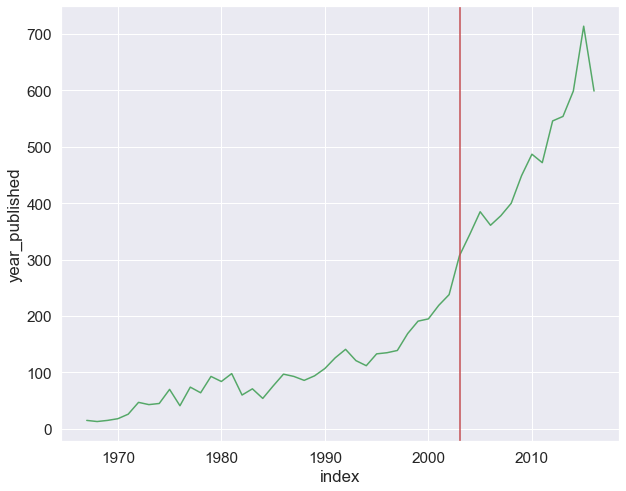

In [70]:
plt.figure(figsize=(10,8))
sns.lineplot(data=published_df.reset_index(), x='index', y='year_published',color='g')
plt.axvline(x=mean_year,color='r')

## Text Analysis of Description Feature

Natural Language Processig is the use of computational techinques to analyse human speech. (Cambria, E. and White, B., 2014) We can use it to gain valuable insight into our data. 

View Description column

In [71]:
bg_df.description

0        die macher is a game about seven sequential po...
1        dragonmaster is a trick-taking card game based...
2        part of the knizia tile-laying trilogy, samura...
3        when you see the triangular box and the luxuri...
4        in acquire, each player strategically invests ...
                               ...                        
10527    description from the publisher:&#10;&#10;silve...
10528    codex: card-time strategy is a customizable, n...
10529    time to walk about town and take some pictures...
10530    the race is on for the robots of the robo rall...
10531    the deluxe edition comes in a double tall box ...
Name: description, Length: 10532, dtype: object

Remove special characters present in description feature using for loop

In [72]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    bg_df['description'] = bg_df['description'].str.replace(char, ' ');

Create new Dataframe variable with Description feature

In [73]:
description_df = pd.DataFrame(bg_df,columns=['description'])

Remove expected redundant words from feature

In [74]:
expected_words = ("game", "games", "play", "player", "players", 
                    "played", "playing", "set", "card", "cards", "edition", 
                    "board", "dice", "rules", "win", "wins", "move", "deck", "roll", 
                    "pieces", "time", "score", "winner", "tiles", "round", "box",'10','4','one','two',
                     'three','3','1','2','s','G','5','6')

Remove stop words and expected words

In [75]:
description_df['description'] =description_df["description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
description_df['description'] =description_df["description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in expected_words))

Create new column that tokenizes each word in a list object column

In [76]:
description_df['tokenized_sents'] = description_df.apply(lambda row: nltk.word_tokenize(row['description']), axis=1)

View DataFrame

In [77]:
description_df

description  \
0      die macher seven sequential political races di...   
1      dragonmaster trick taking based older called c...   
2      part knizia tile laying trilogy samurai mediev...   
3      see triangular luxurious large blocks tell des...   
4      acquire strategically invests businesses tryin...   
...                                                  ...   
10527  description publisher silver bayonet recreates...   
10528  codex strategy customizable non collectable fa...   
10529  walk town take pictures 1960s japan half size ...   
10530  race robots robo rally automobile factory work...   
10531  deluxe comes double tall accommodate sleeved p...   

                                         tokenized_sents  
0      [die, macher, seven, sequential, political, ra...  
1      [dragonmaster, trick, taking, based, older, ca...  
2      [part, knizia, tile, laying, trilogy, samurai,...  
3      [see, triangular, luxurious, large, blocks, te...  
4      [acquire, strategically, invests, businesses, ...  
...                                                  ...  
10527  [description, publisher, silver, bayonet, recr...  
10528  [codex, strategy, customizable, non, collectab...  
10529  [walk, town, take, pictures, 1960s, japan, hal...  
10530  [race, robots, robo, rally, automobile, factor...  
10531  [deluxe, comes, double, tall, accommodate, sle...  

[10532 rows x 2 columns]

Create an empty dictionary object and a for loop to iterate through each row in tokenized_sents and add each word from the list

In [78]:
DF = {}
for i in range(len(description_df['tokenized_sents'])):
    tokens = description_df['tokenized_sents'][i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

In [79]:
len(DF)

46698

Create a function for stemming the tokenized words

In [80]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

Create a function to convert numbers to text

In [81]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

Create Preprocess function to run other functions

In [82]:
def preprocess(data):
    data = stemming(data)
    data = convert_numbers(data)

Loop through words in dictionary object

In [83]:
total_vocab = [x for x in DF]
total_vocab

['die',
 'macher',
 'seven',
 'sequential',
 'political',
 'races',
 'different',
 'regions',
 'germany',
 'charge',
 'national',
 'parties',
 'must',
 'manage',
 'limited',
 'resources',
 'help',
 'party',
 'victory',
 'winning',
 'points',
 'regional',
 'elections',
 'four',
 'ways',
 'scoring',
 'first',
 'election',
 'supply',
 'eighty',
 'depending',
 'size',
 'region',
 'well',
 'second',
 'media',
 'influence',
 'receive',
 'control',
 'third',
 'membership',
 'grow',
 'progresses',
 'fair',
 'number',
 'lastly',
 'platform',
 'matches',
 'opinions',
 'end',
 '1986',
 'featured',
 'old',
 'west',
 'supported',
 '1997',
 'supports',
 'united',
 'updated',
 'several',
 'features',
 '2006',
 'also',
 'adds',
 'shorter',
 'variant',
 'additional',
 'updates',
 'original',
 'designer',
 'valley',
 'classic',
 'line',
 'dragonmaster',
 'trick',
 'taking',
 'based',
 'older',
 'called',
 'coup',
 'etat',
 'given',
 'plastic',
 'gems',
 'represent',
 'get',
 'dealer',
 'five',
 'hands',

Show 100 first words in dictionary object

In [84]:
print(total_vocab[:100])

['die', 'macher', 'seven', 'sequential', 'political', 'races', 'different', 'regions', 'germany', 'charge', 'national', 'parties', 'must', 'manage', 'limited', 'resources', 'help', 'party', 'victory', 'winning', 'points', 'regional', 'elections', 'four', 'ways', 'scoring', 'first', 'election', 'supply', 'eighty', 'depending', 'size', 'region', 'well', 'second', 'media', 'influence', 'receive', 'control', 'third', 'membership', 'grow', 'progresses', 'fair', 'number', 'lastly', 'platform', 'matches', 'opinions', 'end', '1986', 'featured', 'old', 'west', 'supported', '1997', 'supports', 'united', 'updated', 'several', 'features', '2006', 'also', 'adds', 'shorter', 'variant', 'additional', 'updates', 'original', 'designer', 'valley', 'classic', 'line', 'dragonmaster', 'trick', 'taking', 'based', 'older', 'called', 'coup', 'etat', 'given', 'plastic', 'gems', 'represent', 'get', 'dealer', 'five', 'hands', 'slightly', 'goals', 'hand', 'dealt', 'decides', 'best', 'suits', 'current', 'penalized

In [85]:
for i in DF:
    DF[i] = len(DF[i])
print(DF)

{'die': 1112, 'macher': 2, 'seven': 417, 'sequential': 22, 'political': 242, 'races': 179, 'different': 2178, 'regions': 125, 'germany': 208, 'charge': 117, 'national': 94, 'parties': 50, 'must': 2488, 'manage': 257, 'limited': 369, 'resources': 634, 'help': 726, 'party': 346, 'victory': 1433, 'winning': 546, 'points': 2737, 'regional': 18, 'elections': 19, 'four': 1802, 'ways': 398, 'scoring': 567, 'first': 3105, 'election': 34, 'supply': 312, 'eighty': 6, 'depending': 469, 'size': 313, 'region': 174, 'well': 1311, 'second': 865, 'media': 21, 'influence': 423, 'receive': 316, 'control': 1169, 'third': 385, 'membership': 8, 'grow': 153, 'progresses': 112, 'fair': 77, 'number': 1884, 'lastly': 14, 'platform': 19, 'matches': 170, 'opinions': 11, 'end': 2089, '1986': 23, 'featured': 57, 'old': 434, 'west': 243, 'supported': 39, '1997': 28, 'supports': 55, 'united': 174, 'updated': 132, 'several': 689, 'features': 707, '2006': 71, 'also': 2654, 'adds': 306, 'shorter': 78, 'variant': 244, '

In [86]:
dict(sorted(DF.items(), key=lambda item: item[1]))

{'buddhas': 1,
 'admins': 1,
 'opinionatedgamers': 1,
 'civilize': 1,
 'castillos': 1,
 'elfencities': 1,
 'elfcarts': 1,
 'trollwagons': 1,
 'readjustment': 1,
 'depictions': 1,
 'weinbrandbohne': 1,
 'wachsbohne': 1,
 'erweiterungs': 1,
 'uncontested': 1,
 'honeycomb': 1,
 'anfa': 1,
 'leila': 1,
 'dirhams': 1,
 'stickpin': 1,
 'endow': 1,
 'weekdays': 1,
 'toiling': 1,
 'comingsoon': 1,
 'reprogram': 1,
 'outhouses': 1,
 'rectify': 1,
 'drunter': 1,
 'rossdorf': 1,
 'tumbleweed': 1,
 'varmint': 1,
 'benny': 1,
 'ceptin': 1,
 'marbling': 1,
 'landholders': 1,
 'stoppin': 1,
 'landholder': 1,
 'purty': 1,
 'townfolk': 1,
 'retracted': 1,
 'conqu': 1,
 'planete': 1,
 'modulaire': 1,
 'troves': 1,
 'battlemist': 1,
 'blasted': 1,
 'y2k': 1,
 'brainwash': 1,
 'membrane': 1,
 'unmentionable': 1,
 '2k': 1,
 'rulings': 1,
 'isc': 1,
 'compendiums': 1,
 'buzzle': 1,
 'zimmer': 1,
 'ascalion': 1,
 'frieden': 1,
 'handshakes': 1,
 'hs': 1,
 'superfluous': 1,
 'handshake': 1,
 'jostein': 1,
 'g

In [87]:
sorted(DF, key=DF.get, reverse=True)[:50]

['quot',
 'turn',
 'first',
 'points',
 'new',
 'also',
 'take',
 'must',
 'different',
 'end',
 'get',
 'use',
 'number',
 'four',
 'may',
 'many',
 'make',
 'place',
 'world',
 'special',
 'battle',
 'hand',
 'victory',
 'based',
 'war',
 'order',
 'well',
 'like',
 'try',
 'another',
 'turns',
 'start',
 'way',
 'series',
 'action',
 'used',
 'map',
 'back',
 'control',
 'combat',
 'rsquo',
 'takes',
 'five',
 'build',
 'either',
 'using',
 'every',
 'best',
 'die',
 'next']

In [88]:
preprocess(DF)

In [89]:
words_df = pd.DataFrame.from_dict(DF,orient='index',columns=['count'])
words_df

count
die          1112
macher          2
seven         417
sequential     22
political     242
...           ...
yangtze         1
placent         1
fwa             1
reboot          1
spacers         1

[46698 rows x 1 columns]

In [90]:
sort_words = words_df.sort_values(by='count',ascending=False)


In [91]:
sort_words.head(50)

count
quot        3571
turn        3344
first       3105
points      2737
new         2676
also        2654
take        2518
must        2488
different   2178
end         2089
get         2020
use         1958
number      1884
four        1802
may         1786
many        1744
make        1652
place       1599
world       1531
special     1480
battle      1457
hand        1436
victory     1433
based       1417
war         1414
order       1411
well        1311
like        1304
try         1300
another     1281
turns       1264
start       1246
way         1242
series      1233
action      1192
used        1187
map         1183
back        1174
control     1169
combat      1167
rsquo       1166
takes       1156
five        1148
build       1143
either      1140
using       1133
every       1122
best        1115
die         1112
next        1111

In [92]:
sort_words_50 = sort_words.iloc[:50]

By using a bar chart and plotting the top 50 words used we are able to see the distribution and number of times these words appear.

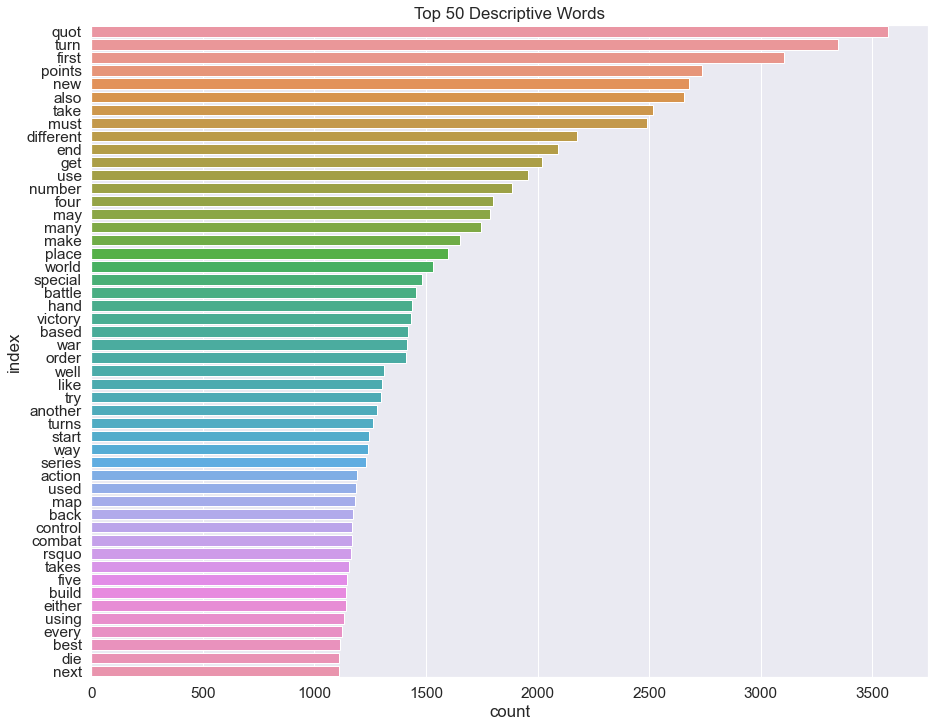

In [93]:
plt.figure(figsize=(15,12))
plt.title('Top 50 Descriptive Words')
sns.barplot(data=sort_words_50.reset_index(),y='index',x='count');